# Hi-C Diff

Draw the difference between two Hi-C contact matrices.

In [1]:
import coolbox
from coolbox.api import *

In [2]:
coolbox.__version__

'0.3.0'

In [3]:
data_dir = "../../../tests/test_data/"
cl1 = f"{data_dir}/cool_chr1_89000000_90400000_for_cmp_1.mcool"
cl2 = f"{data_dir}/cool_chr1_89000000_90400000_for_cmp_2.mcool"

region = "chr1:89237500-90227500"

Normalize with `expect` matrix (decay along diagonal), difference with `diff` (matrix_A - matrix_B):

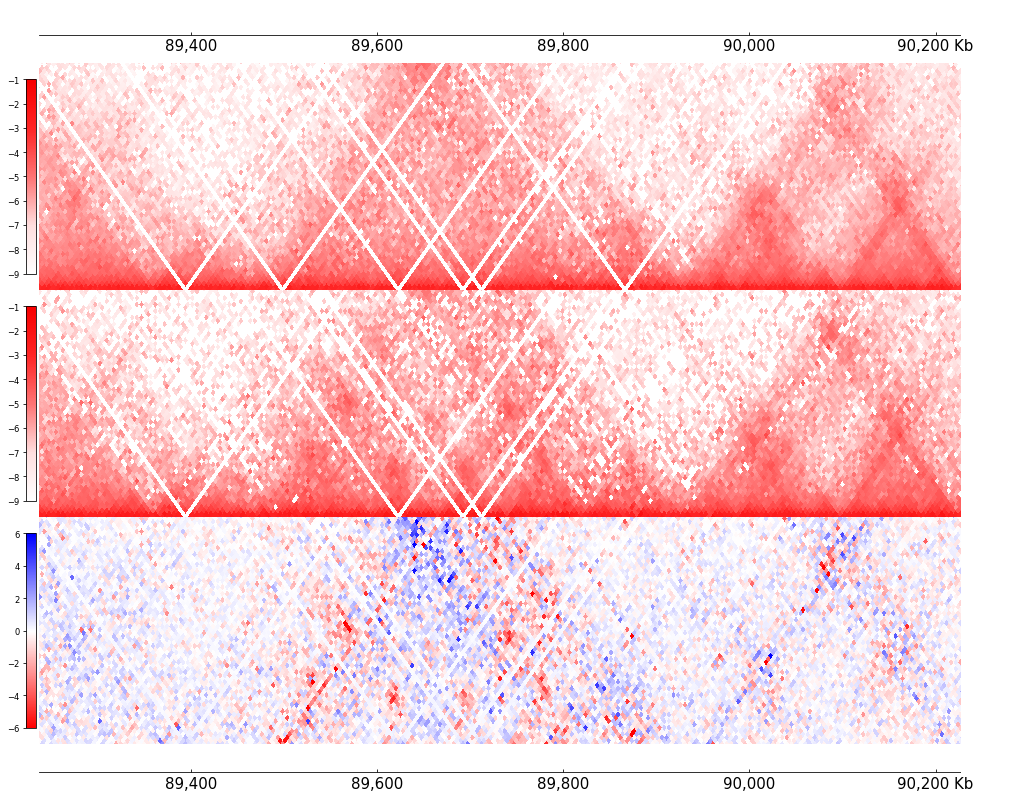

In [4]:
with MinValue(-9), MaxValue(-1):
    cool1 = Cool(cl1)
    cool2 = Cool(cl2)

frame = XAxis() + \
    cool1 + \
    cool2 + \
    HiCDiff(cool1, cool2, normalize='expect', diff_method='diff', cmap="bwr_r") + \
    MinValue(-6) + MaxValue(6)  + \
    XAxis()
frame *= Feature(depth_ratio=0.35)
frame.plot(region)

### CLI code

In [5]:
%%bash

data_dir="../../../tests/test_data/"
cl1="${data_dir}/cool_chr1_89000000_90400000_for_cmp_1.mcool"
cl2="${data_dir}/cool_chr1_89000000_90400000_for_cmp_2.mcool"

coolbox add XAxis - \
start_with Feature --depth_ratio "0.35" - \
    start_with Feature --min_value "-9" --max_value "-1" - \
        add Cool $cl1 - \
        add Cool $cl2 - \
    end_with - \
    add HiCDiff $cl1 $cl2 --normalize 'expect' --diff_method 'diff' --cmap 'bwr_r' - \
    add MinValue "-6" - \
    add MaxValue "6" - \
end_with - \
add XAxis - \
goto "chr1:89237500-90227500" - \
plot /tmp/test_coolbox_hicdiff.png